# Data Visualization and Feature Selection

**Objectives**: The purpose of this excercise is for features visualization and selection with different approaches with correlation analysis and recursive feature elimination.

## Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploratory

**About Dataset** [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry 
* fractal dimension ("coastline approximation" - 1)

All feature values are recoded with four significant digits. The mean, standard error, and worst or largest of these features were computed for each image. There are no missing attribute values.

Target: Column `diagnosis`
- M = malignant
- B = benign

Class distribution: 357 benign, 212 malignant

In [2]:
df = pd.read_csv("data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# Get column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
# Set target and features
x = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"]

## Data Visualization

### Target

The number of malignant is 212
The number of benign is 357


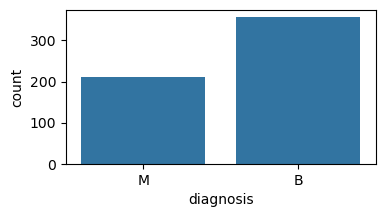

In [5]:
# Visualize the target column
plt.figure(figsize=(4, 2))
sns.countplot(x=y);
print("The number of malignant is", y.value_counts()["M"])
print("The number of benign is", y.value_counts()["B"])

The count of `benign` instances surpasses that of `malignant` in the target columns, potentially leading to bias towards `benign`. Thus, it might be necessary to randomly remove some `benign` rows to achieve balance in the target values.

### Features 

In [6]:
# Features statistic
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The feature columns display significant disparities in the ranges of their values. Therefore, it is beneficial to apply normalization or scaling techniques during the analysis.

Given that all features are continuous covariates, We can standardize the data using a normal distribution with a mean of $\mu$ and a standard deviation of $\sigma$.
$$x_{norm} = \frac {x - \mu} {\sigma}$$

In [7]:
# Normalize data
x_norm = (x - x.mean()) / x.std()
x_norm.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214


Create a **violin plot** to visually compare the distribution of numeric data for `benign` and `malignant` categories across each feature.

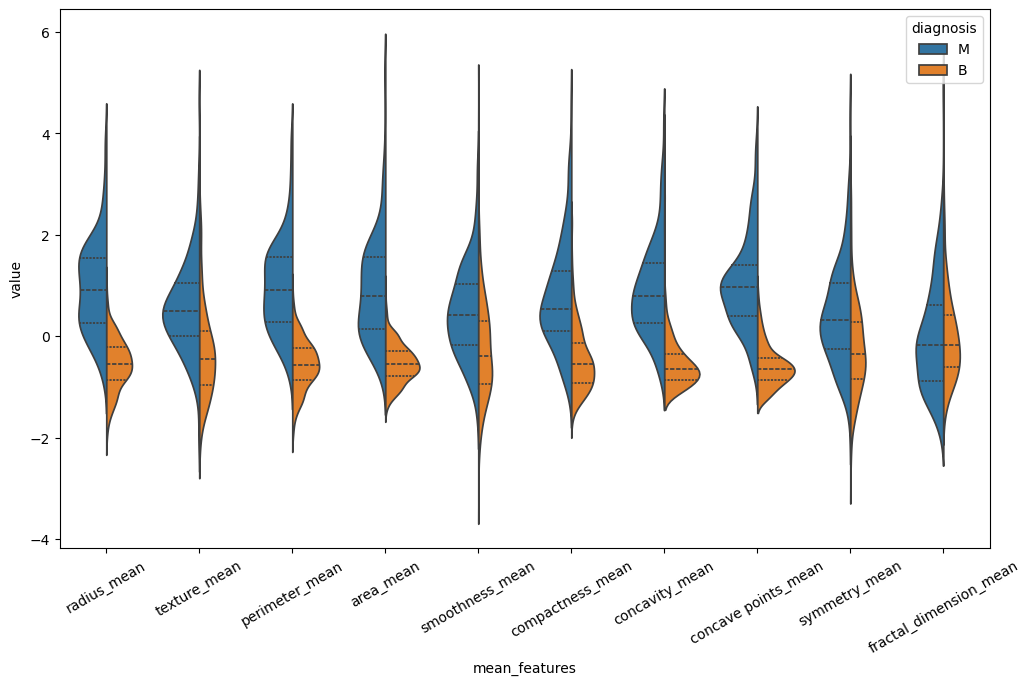

In [8]:
# Violin plot for the mean features
plot_data_mean = pd.melt(pd.concat([y, x_norm.iloc[:, 0:10]], axis=1), 
                         id_vars="diagnosis", var_name="mean_features")

plt.figure(figsize=(12, 7))
sns.violinplot(x="mean_features", y="value", hue="diagnosis", data=plot_data_mean, inner="quartile", split=True)
plt.xticks(rotation=30);

This represents a binary classification task, and having features that distinctly differentiate between the two target categories is crucial for accurate classification. Observing the graph, we notice that the median values of features such as `radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, `compactness_mean`, and `concavity_mean` are well-separated between the two classes. In contrast, the median values of the `fractal_dimension_mean` feature are closely aligned, making it difficult to discern the differences between the two classes.

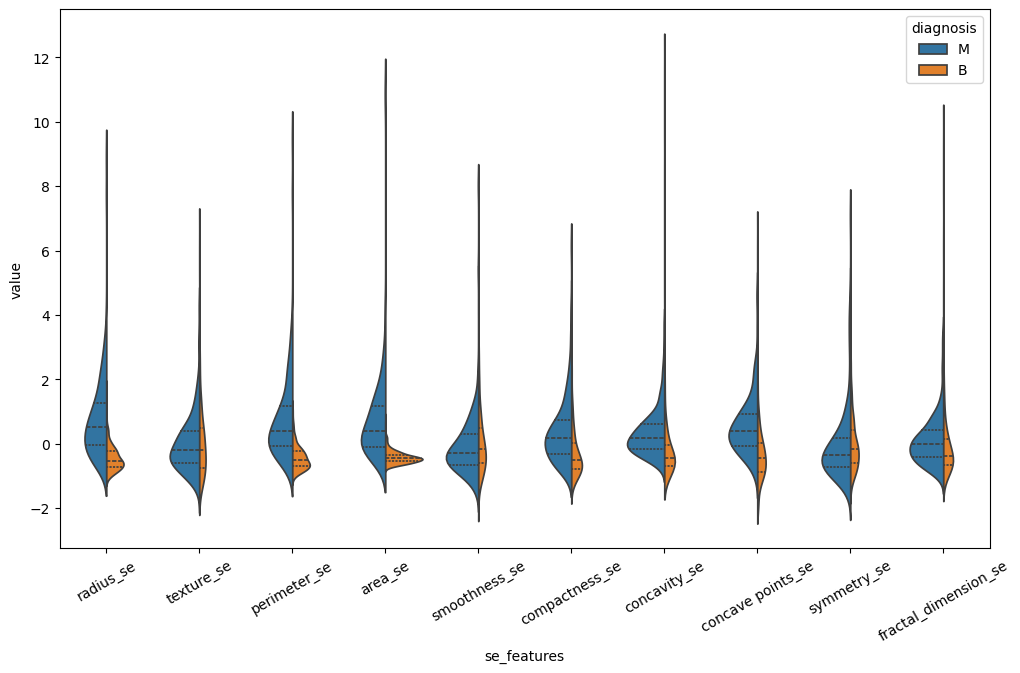

In [9]:
# Violin plot for standard error features
plot_data_se = pd.melt(pd.concat([y, x_norm.iloc[:, 10:20]], axis=1), 
                       id_vars="diagnosis", var_name="se_features")
plt.figure(figsize=(12, 7))
sns.violinplot(plot_data_se, x="se_features", y="value", hue="diagnosis", inner="quartile", split=True);
plt.xticks(rotation=30);

The median values of `radius_se`, `perimeter_se`, `compactness_se`, `concavity_se`, and `concave points_se` are notably distant from each other, whereas those of `texture_se`, `smoothness_se`, and `symmetry_se` are relatively close.

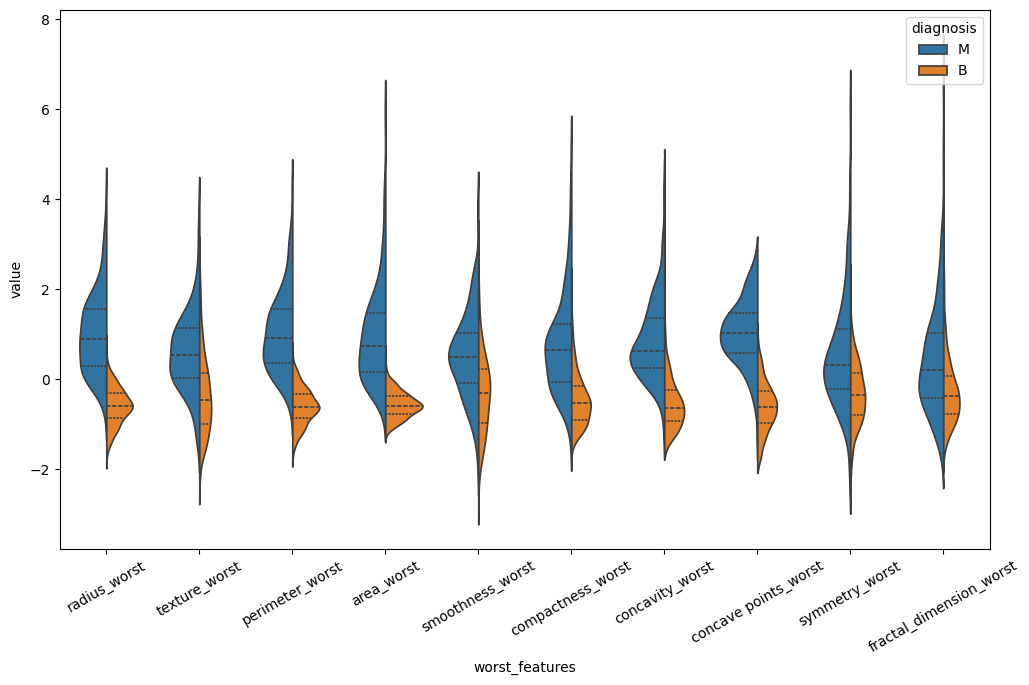

In [10]:
# Violine plot for worst (largest) features
plot_data_worst = pd.melt(pd.concat([y, x_norm.iloc[:, 20:31]], axis=1), 
                          id_vars="diagnosis", var_name="worst_features")
plt.figure(figsize=(12, 7))
sns.violinplot(plot_data_worst, x="worst_features", y="value", hue="diagnosis", split=True, inner="quartile");
plt.xticks(rotation=30);

Visulize data distribution with swarm plot

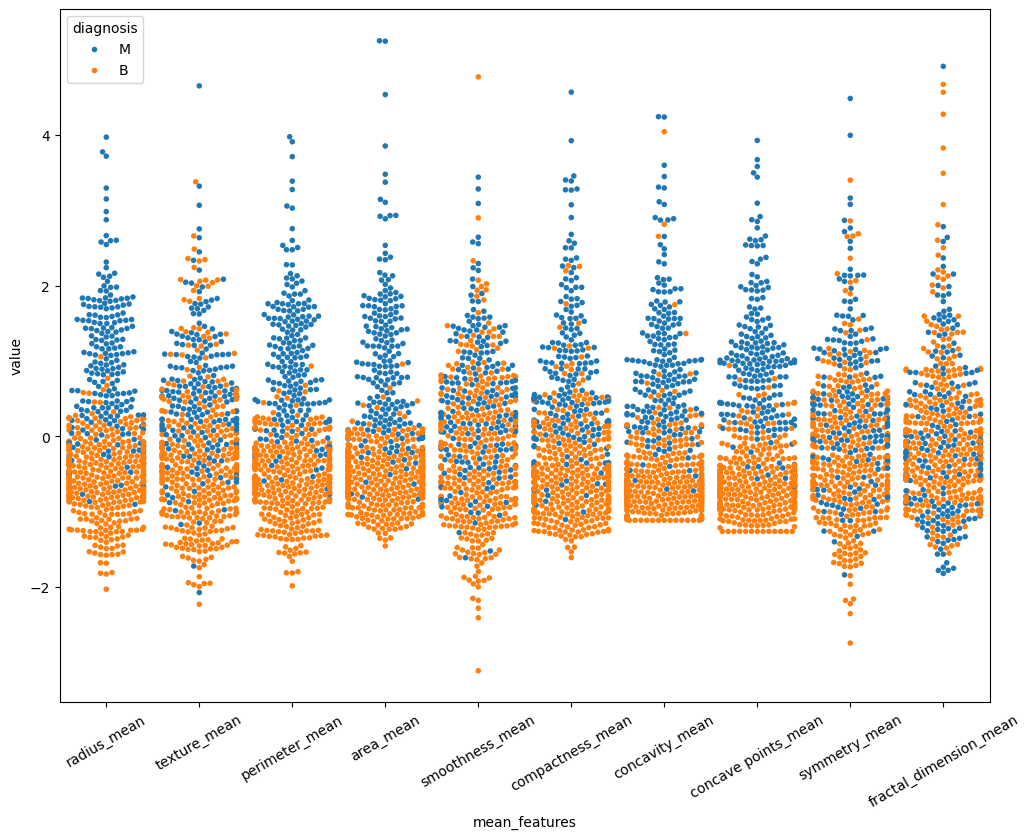

In [11]:
plt.figure(figsize=(12,9))
sns.swarmplot(x="mean_features", y="value", hue="diagnosis", data=plot_data_mean, size=4);
plt.xticks(rotation=30);

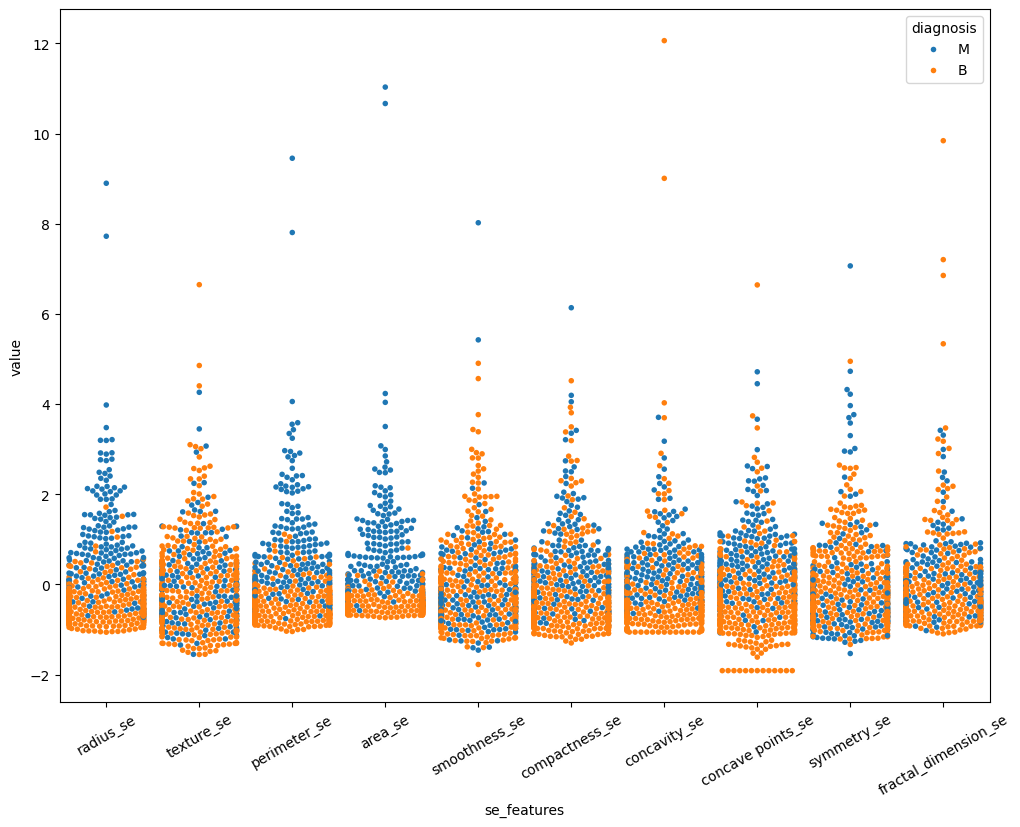

In [12]:
plt.figure(figsize=(12,9))
sns.swarmplot(x="se_features", y="value", hue="diagnosis", data=plot_data_se, size=4);
plt.xticks(rotation=30);

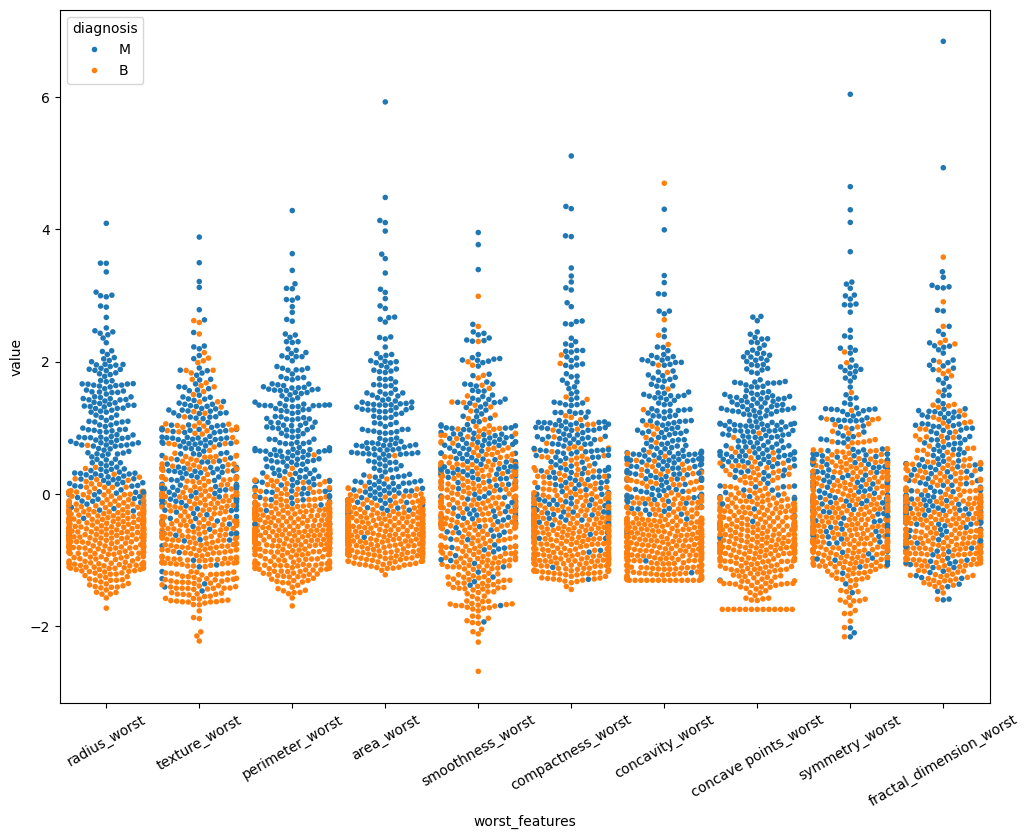

In [13]:
plt.figure(figsize=(12,9))
sns.swarmplot(x="worst_features", y="value", hue="diagnosis", data=plot_data_worst, size=4);
plt.xticks(rotation=30);

The malignant and benign data within the features of `smoothness`, `fractal_dimension`, and `texture` (including mean, standard error, and worst values) are blended together, posing challenges for classification

Visulalize correlation between variables with heat map

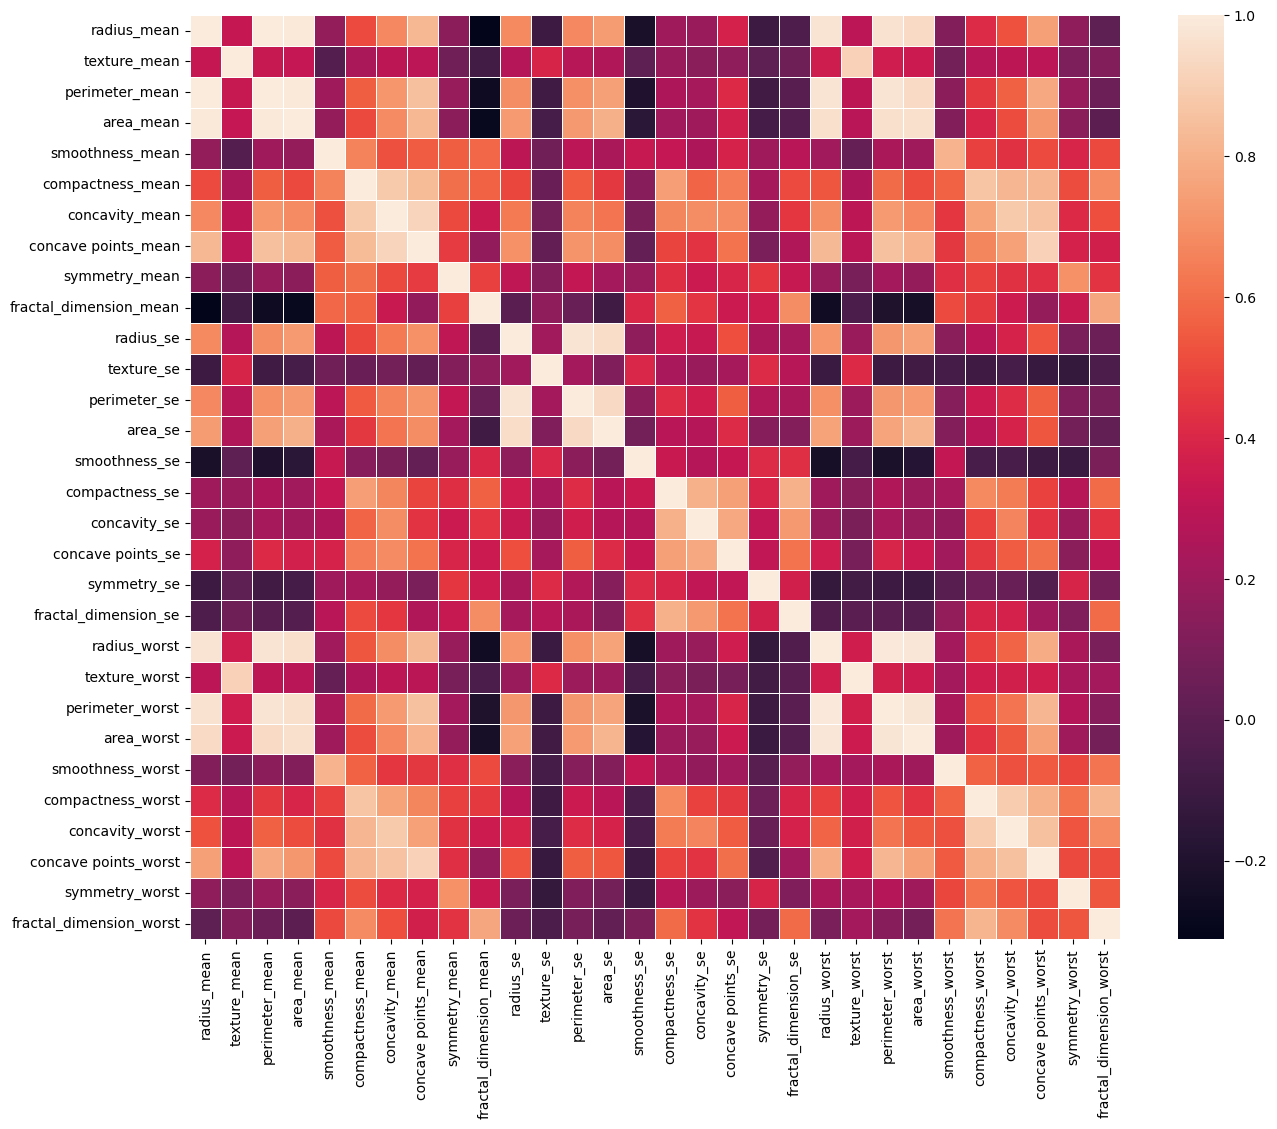

In [14]:
# Heat map
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(x_norm.corr(), linewidths=0.5, ax=ax);

# Feature Selection

Numerous features may redundantly represent similar information, potentially leading to increased model computation time. Therefore, our objective is to minimize the number of features in a predictor while preserving the model's quality. This reduction in features not only improves computational efficiency but also enhances cost-effectiveness.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

In [16]:
# Split data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2024)

## Corralation 

A high correlation signifies a robust relationship between two features. Features exhibiting high correlation can be eliminated, as one variable can essentially infer the values of others. Having numerous features explaining the same information is redundant and may elevate a model's complexity, thereby enhancing computational efficiency.

A single feature is chosen from a cluster of highly correlated features, as indicated in the heatmap, with distinct segregation illustrated in the swarm plots. For instance, among the highly correlated features such as `radius_mean`, `perimeter_mean`, `area_mean`, `radius_worst`, and `area_worst`, **`area_worst`** is chosen due to its clear segregation observed in the swarm plot. Similarlly, 
- **`texture_worst`** is chosen between `texture_mean` and `texture_worst`.
- **`smoothness_mean`** is selected over `smoothness_worst`.
- **`concave points_mean`** is selected in group of `compactness_mean`, `concavity_mean`, `concave points_mean`, `compactness_worst`, `concavity_worst`, and `concave points_worst`.
- **`symmetry_worst`** is chosen between itself and `symmetry_mean`.
- **`area_se`** is chosen among `radius_se`, `perimeter_se`, and `area_se`
- **`concave points_se`** is selected among `compactness_se`, `concavity_se`, `concave points_se`, and `fractal_dimention_se`
- **`fractal_dimension_worst`** is selected over `fractal_dimension_mean`

The remaining features including **`texture_se`**, **`smoothness_se`**, and **`symmetry_se`** exhibit low correlation with other features, thus they are retained for analysis.

We've condensed the initial set of 30 variables to just 11 features. Subsequently, we'll compare the performance of these features using regression with a model using all features.

In [17]:
features = ["area_worst", "texture_worst", "smoothness_mean", "concave points_mean", "symmetry_worst", 
            "area_se", "concave points_se", "fractal_dimension_worst", "texture_se", "smoothness_se", "symmetry_se"]

rf_reduce = RandomForestClassifier(random_state=2024)

# Perform cross-validation
print(cross_val_score(rf_reduce, x_train[features], y_train, cv=10).mean())

0.9573076923076924


In [18]:
rf_all = RandomForestClassifier(random_state=2024)

# Perform cross-validation
print(cross_val_score(rf_all, x_train, y_train, cv=10).mean())

0.9574358974358974


The regression model `rf_reduce` demonstrates comparable performance to the model utilizing all features. By employing fewer features, we achieve similar performance while maintaining high quality.

Accuracy is 0.953, and f1-score is 0.962


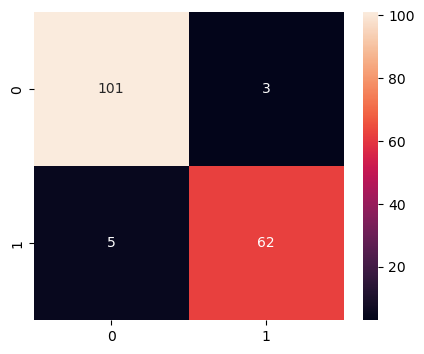

In [19]:
# Fit and evaluate performance on test set
rf_reduce = rf_reduce.fit(x_train[features], y_train)

# Confusion matrix and heat map
cm = confusion_matrix(y_test, rf_reduce.predict(x_test[features]))
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d")

# Accuracy score and f1-score
ac = accuracy_score(y_test, rf_reduce.predict(x_test[features]))
f1 = f1_score(y_test, rf_reduce.predict(x_test[features]), pos_label="B")
print("Accuracy is %.3f, and f1-score is %.3f" %(ac, f1))

## Recursive feature elimination

Starting from a model with all predictors and removing them one by one based on a scoring function

In [22]:
# Instantiate random forest model 
rf_3 = RandomForestClassifier(random_state=2024)
rf_features = x_train.columns[selector.support_]
# Feature selections
selector = RFECV(rf_3, cv=5, scoring="accuracy",)
selector = selector.fit(x_train, y_train)
print("The number of features :", selector.n_features_)
print("Best features :", x_train.columns[selector.support_])
# Cross-validate model
print(cross_val_score(rf_3, x_train[rf_features], y_train, cv=10).mean())

The number of features : 13
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')
0.9599358974358975


Out of the three models, `rf_3` attains the highest accuracy on the test set, including validation through cross-validation. Although `rf_3` utilizes more features compared to `rf_reduce`, it still outperforms the model employing all features.

Accuracy is 0.965, and f1-score is 0.971


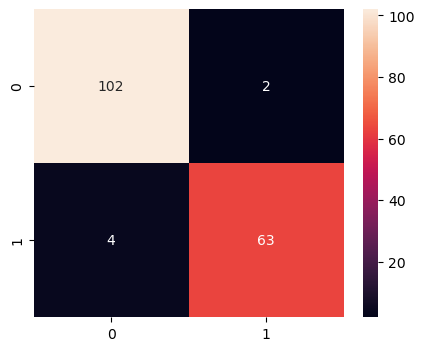

In [23]:
# Fit the model with cross validation
rf_3 = rf_3.fit(x_train[rf_features], y_train)

# Evaluate accuracy
y_pred = rf_3.predict(x_test[rf_features])
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d")

# Accuracy and f1-score
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label="B")
print("Accuracy is %.3f, and f1-score is %.3f" %(ac, f1))